<a href="https://colab.research.google.com/github/ismarano/IAEntregable2/blob/master/entregable3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entregable 3

Importamos las librerias de fastai y os

In [0]:
from fastai.vision import *
import os
from google.colab import files

Vamos a buscar las imagenes, en este caso de coches, motos y camiones. Creamos archivos csv de cada uno.

Descargamos los ficheros

In [2]:
!wget https://raw.githubusercontent.com/IA1819/entregable3-ismarano/master/coche.csv?token=AKN7FSGGXML4AOVP4FX7EG244WF42 -O coche.csv
!wget https://raw.githubusercontent.com/IA1819/entregable3-ismarano/master/moto.csv?token=AKN7FSE7LRMLG7RE6ZEHFHC44WFAS -O moto.csv
!wget https://raw.githubusercontent.com/IA1819/entregable3-ismarano/master/camion.csv?token=AKN7FSGB6FUXUX547UEWAN244WEY2 -O camion.csv

--2019-05-18 17:23:20--  https://raw.githubusercontent.com/IA1819/entregable3-ismarano/master/coche.csv?token=AKN7FSGGXML4AOVP4FX7EG244WF42
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9680 (9.5K) [text/plain]
Saving to: ‘coche.csv’

coche.csv           100%[===================>]   9.45K  --.-KB/s    in 0s      

2019-05-18 17:23:20 (80.2 MB/s) - ‘coche.csv’ saved [9680/9680]

--2019-05-18 17:23:21--  https://raw.githubusercontent.com/IA1819/entregable3-ismarano/master/moto.csv?token=AKN7FSE7LRMLG7RE6ZEHFHC44WFAS
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting res

Vamos a descargar las imagenes y ordenarlas por carpetas

In [3]:
folder = 'coche'
file = 'coche.csv'
path = Path('data/vehiculos')
dest = path/folder
dest.mkdir(parents=True,exist_ok=True)
os.rename(file,path/file)
# Como mucho descargamos 200 imágenes
download_images(path/file,dest,max_pics=200)

Error https://www.todococheszafra.com/wp-content/uploads/2018/08/logo2018.png ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))


In [4]:
folder = 'moto'
file = 'moto.csv'
path = Path('data/vehiculos')
dest = path/folder
dest.mkdir(parents=True,exist_ok=True)
os.rename(file,path/file)
# Como mucho descargamos 200 imágenes
download_images(path/file,dest,max_pics=200)

In [5]:
folder = 'camion'
file = 'camion.csv'
path = Path('data/vehiculos')
dest = path/folder
dest.mkdir(parents=True,exist_ok=True)
os.rename(file,path/file)
# Como mucho descargamos 200 imágenes
download_images(path/file,dest,max_pics=200)

Error https://www.autonomosenruta.com/images/stories/imagenes_2017/imagenes_noviembre17/camion_scania450.jpg ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))


Vamos a eliminar las imagenes que tengan un formato que no pueda ser abierto en la libreria

In [6]:
for c in ['coche','moto','camion']:
  print(c)
  verify_images(path/c,delete=True,max_size=500)

coche


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/vehiculos/coche/00000067.svg'>
moto


cannot identify image file <_io.BufferedReader name='data/vehiculos/moto/00000071.jpg'>
cannot identify image file <_io.BufferedReader name='data/vehiculos/moto/00000043.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


camion


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='data/vehiculos/camion/00000027.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='data/vehiculos/camion/00000099.jpg'>
cannot identify image file <_io.BufferedReader name='data/vehiculos/camion/00000040.jpg'>


Almacenamos el dataset en la variable data.

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path,train=".",valid_pct=0.2,ds_tfms=get_transforms(),size=224,num_workers=4).normalize(imagenet_stats)

Mostramos un batch del dataset

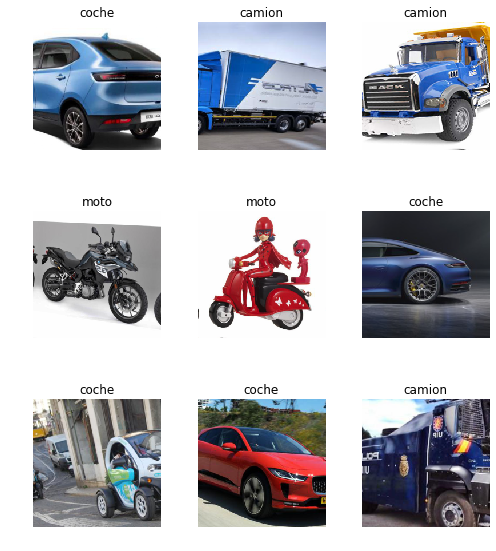

In [8]:
data.show_batch(rows=3,figsize=(7,8))

Creamos una red convolucional usando como base ResNet 34

In [9]:
learn = create_cnn(data,models.resnet34,metrics=[error_rate,accuracy])

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 70188927.08it/s]


Vamos a actualizar los pesos de las ultimas capas

In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.396239,0.466671,0.086207,0.913793,01:21
1,0.899625,0.121024,0.051724,0.948276,01:22
2,0.615039,0.111008,0.051724,0.948276,01:22
3,0.477427,0.111895,0.051724,0.948276,01:22


Guardamos el estado de nuestra red

In [0]:
learn.save('stage-1')

Descongelamos las capas de la red

In [0]:
learn.unfreeze()

Vamos a entrenar las capas de la red

In [54]:
learn.fit_one_cycle(4,max_lr=slice(3e-5,3e-4))

ZeroDivisionError: ignored

Guardamos el estado de la red

In [0]:
learn.save('stage-2')

Cargamos el estado que hemos guardado

In [15]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (232 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
moto,moto,moto,moto,moto
Path: data/vehiculos;

Valid: LabelList (57 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
moto,camion,coche,moto,camion
Path: data/vehiculos;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_s

Creamos una interpretacion de los resultados que hemos obtenido

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

Mostramos la matriz de confusion

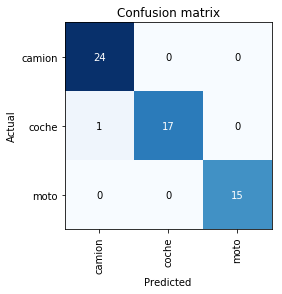

In [17]:
interp.plot_confusion_matrix()

Vamos a detectar las imagenes que tienen una mayor perdida

In [0]:
from fastai.widgets import *

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn,ds_type=DatasetType.Valid)

Mostramos los paths de las 10 imagenes con mas perdida

In [20]:
ds.to_df().iloc[idxs[:10]]

,x,y
227,coche/00000087.jpg,coche
183,coche/00000030.jpg,coche
14,moto/00000038.png,moto
217,coche/00000032.jpg,coche
214,coche/00000000.jpg,coche
185,coche/00000042.jpg,coche
184,coche/00000061.jpg,coche
187,coche/00000060.jpg,coche
168,coche/00000083.jpg,coche
159,coche/00000034.jpg,coche


Mostramos algunas de esas imagenes

In [45]:
img = open_image(path/'moto'/'00000096.jpg')
img

FileNotFoundError: ignored

In [47]:
img = open_image(path/'coche'/'00000045.png')
img

FileNotFoundError: ignored

In [49]:
img = open_image(path/'moto'/'00000038.png')
img

FileNotFoundError: ignored

In [53]:
img = open_image(path/'moto'/'00000066.jpg')
img

FileNotFoundError: ignored

In [51]:
img = open_image(path/'moto'/'00000001.jpg')
img

FileNotFoundError: ignored

Las imagenes mostradas arriba seran eliminadas.

In [0]:
rm /content/data/vehiculos/moto/00000096.jpg

In [0]:
rm /content/data/vehiculos/coche/00000045.png

In [0]:
rm /content/data/vehiculos/moto/00000038.png

In [0]:
rm /content/data/vehiculos/moto/00000066.jpg

In [0]:
rm /content/data/vehiculos/moto/00000001.jpg

Vamos a poner el modelo en produccion, para ello exportaremos el modelo.

In [0]:
learn.export()

Vemos que se a creado el fichero

In [27]:
!ls data/vehiculos

camion	camion.csv  coche  coche.csv  export.pkl  models  moto	moto.csv


Indicamos al sistema que use la cpu para el proceso de inferencia

In [0]:
defaults.device = torch.device('cpu')

Descargamos nuevas imagenes

In [30]:
!wget https://www.motor.mapfre.es/wp-content/uploads/2019/01/coches-se-matriculan-al-dia-en-espana2.jpg -O coche.jpg

--2019-05-18 16:51:24--  https://www.motor.mapfre.es/wp-content/uploads/2019/01/coches-se-matriculan-al-dia-en-espana2.jpg
Resolving www.motor.mapfre.es (www.motor.mapfre.es)... 195.235.248.92
Connecting to www.motor.mapfre.es (www.motor.mapfre.es)|195.235.248.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70190 (69K) [image/jpeg]
Saving to: ‘coche.jpg’

coche.jpg           100%[===================>]  68.54K   222KB/s    in 0.3s    

2019-05-18 16:51:25 (222 KB/s) - ‘coche.jpg’ saved [70190/70190]



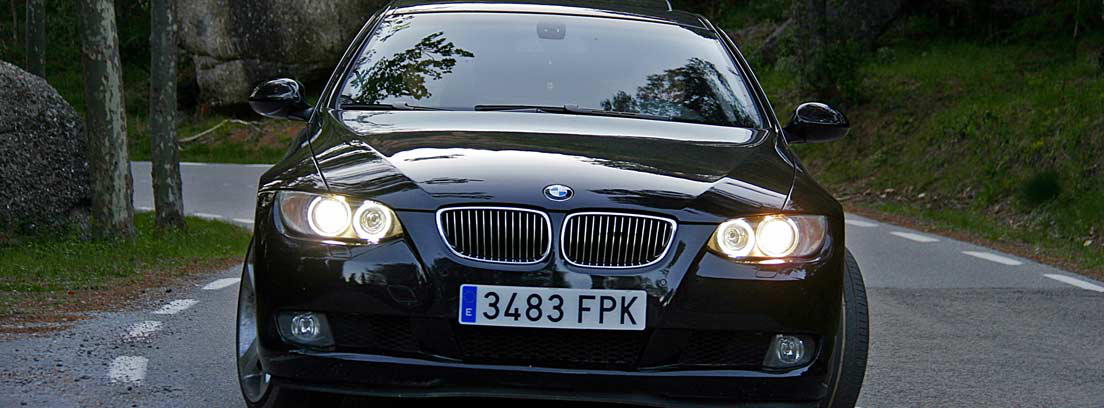

In [31]:
coche = open_image('coche.jpg')
coche

Creamos un learner

In [0]:
learn = load_learner(path)

Hacemos una prediccion

In [33]:
pred_class,pred_idx,outputs=learn.predict(coche)
pred_class

Category coche

Hacemos lo mismo en estos dos casos

In [34]:
!wget https://motor.elpais.com/wp-content/uploads/imagenes/2015/07/28/actualidad/1438078260_169276_1438078315_noticia_grande-980x540.jpg -O moto.jpg

--2019-05-18 16:55:42--  https://motor.elpais.com/wp-content/uploads/imagenes/2015/07/28/actualidad/1438078260_169276_1438078315_noticia_grande-980x540.jpg
Resolving motor.elpais.com (motor.elpais.com)... 54.192.151.108, 54.192.151.128, 54.192.151.83, ...
Connecting to motor.elpais.com (motor.elpais.com)|54.192.151.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84299 (82K) [image/jpeg]
Saving to: ‘moto.jpg’

moto.jpg            100%[===================>]  82.32K   236KB/s    in 0.3s    

2019-05-18 16:55:43 (236 KB/s) - ‘moto.jpg’ saved [84299/84299]



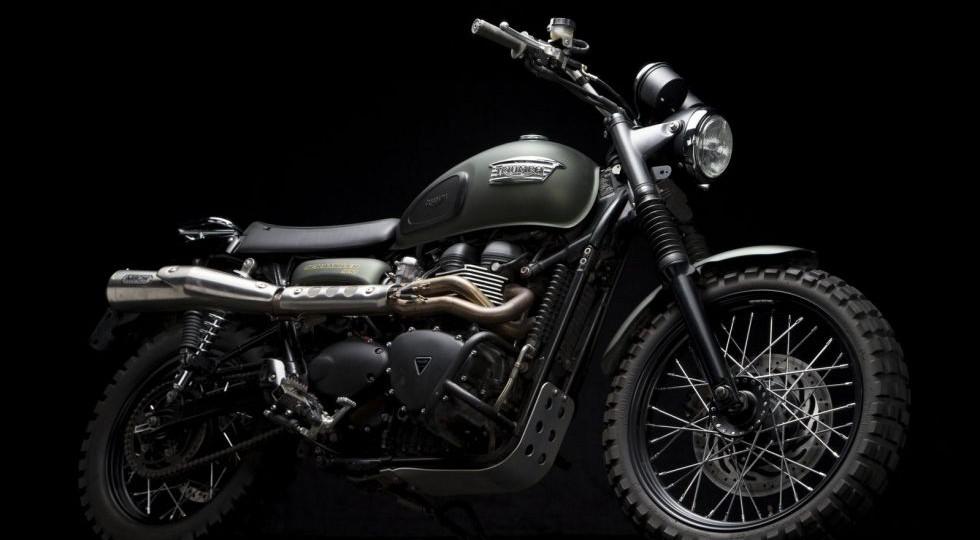

In [35]:
moto = open_image('moto.jpg')
moto

In [0]:
learn = load_learner(path)

In [37]:
pred_class,pred_idx,outputs=learn.predict(moto)
pred_class

Category moto

In [38]:
!wget https://photo.via-mobilis.com/32/1/3099785-foto-camion.jpg -O camion.jpg

--2019-05-18 16:57:43--  https://photo.via-mobilis.com/32/1/3099785-foto-camion.jpg
Resolving photo.via-mobilis.com (photo.via-mobilis.com)... 54.38.179.3, 2001:41d0:303:6003::1
Connecting to photo.via-mobilis.com (photo.via-mobilis.com)|54.38.179.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81651 (80K) [image/jpeg]
Saving to: ‘camion.jpg’

camion.jpg          100%[===================>]  79.74K   273KB/s    in 0.3s    

2019-05-18 16:57:45 (273 KB/s) - ‘camion.jpg’ saved [81651/81651]



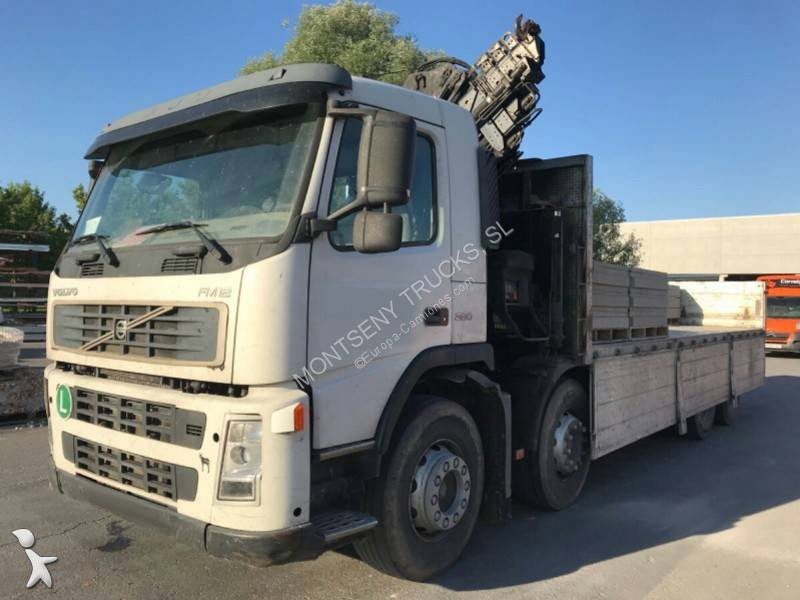

In [39]:
camion = open_image('camion.jpg')
camion

In [0]:
learn = load_learner(path)

In [42]:
pred_class,pred_idx,outputs=learn.predict(camion)
pred_class

Category camion

Vamos a comparar los tiempos obtenidos al entrenar un modelo usando gpu y cpu

Estos son los tiempos usando gpu

![texto alternativo](https://github.com/IA1819/entregable3-ismarano/blob/master/Captura.PNG?raw=true)

Estos son los tiempos usando cpu

![texto alternativo](https://github.com/IA1819/entregable3-ismarano/blob/master/Captura2.PNG?raw=true)

Podemos ver que los de gpu son ligeramente mejores